In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:

from google.colab import files
import pandas as pd
uploaded = files.upload()

import io
df = pd.read_excel(io.BytesIO(uploaded['Ev Sales.xlsx']))
print(df.head())


Saving Ev Sales.xlsx to Ev Sales.xlsx
        YEAR  2 W   3 W  4 W  BUS  TOTAL
0 2017-04-01   96  4748  198    0   5042
1 2017-05-01   91  6720  215    2   7028
2 2017-06-01  137  7178  149    1   7465
3 2017-07-01  116  8775  120    0   9011
4 2017-08-01   99  8905  137    0   9141


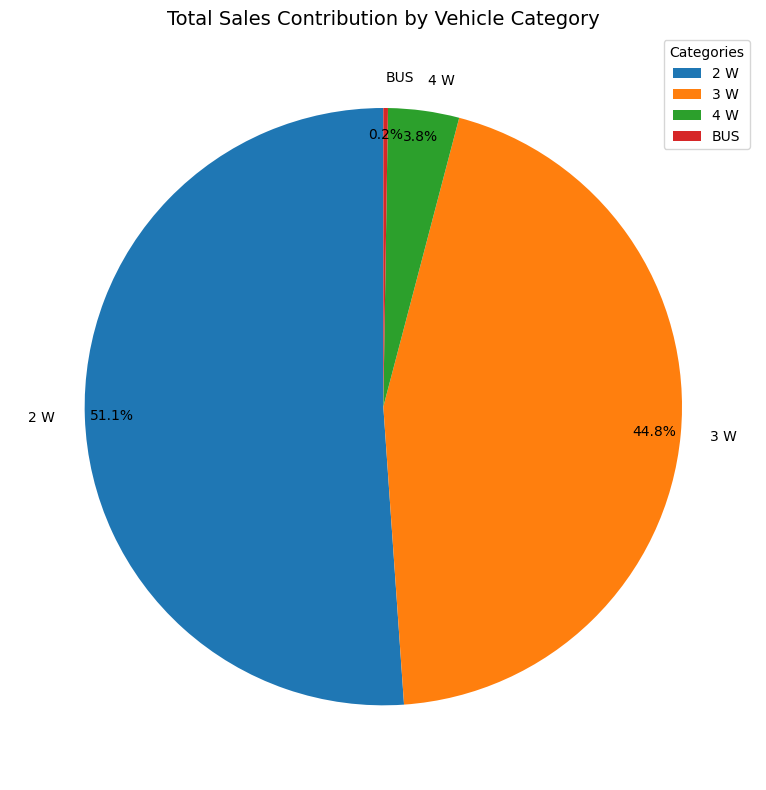

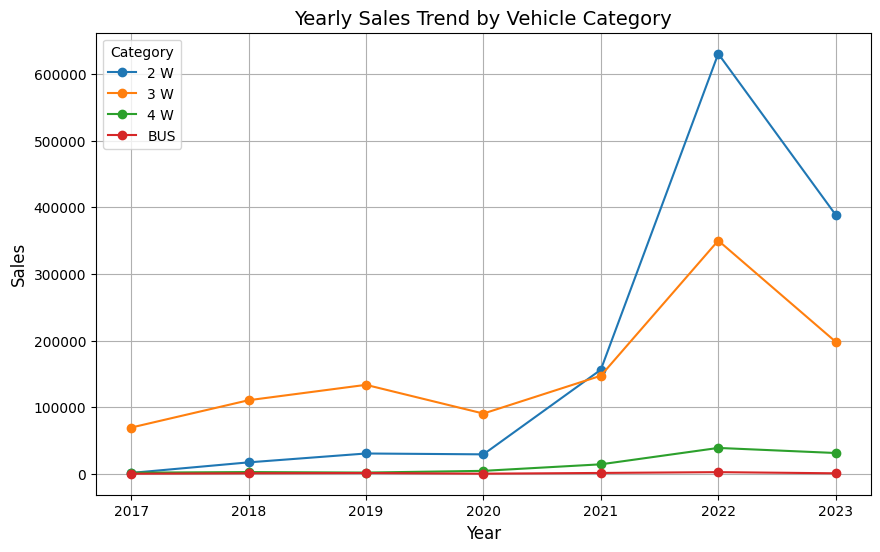

In [ ]:
import matplotlib.pyplot as plt

# Convert YEAR to datetime for time series analysis
df['YEAR'] = pd.to_datetime(df['YEAR'])

# Calculate the total sales contribution of each category over the dataset period
category_totals = df[['2 W', '3 W', '4 W', 'BUS']].sum()

# Plotting the sales contributions of each category
plt.figure(figsize=(8, 8))
category_totals.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    labels=category_totals.index,
    textprops={'fontsize': 10},  # Adjust text size
    pctdistance=0.91,  # Position percentage labels closer to the outer edge
    labeldistance=1.1  # Position category labels outside the pie chart
)
plt.title("Total Sales Contribution by Vehicle Category", fontsize=14)
plt.ylabel("")  # Hide the y-axis label
plt.legend(category_totals.index, title="Categories", loc="upper right", fontsize=10)
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

# Aggregate yearly data to examine trends over time
df['Year'] = df['YEAR'].dt.year
annual_sales = df.groupby('Year')[['2 W', '3 W', '4 W', 'BUS', 'TOTAL']].sum()

# Plotting the yearly trend for each category
annual_sales[['2 W', '3 W', '4 W', 'BUS']].plot(kind='line', figsize=(10, 6), marker='o')
plt.title("Yearly Sales Trend by Vehicle Category", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Sales", fontsize=12)
plt.legend(title="Category")
plt.grid(True)
plt.show()


In [ ]:
# Calculate compound annual growth rate (CAGR) for each vehicle category
# Extract initial and final sales values for each category
initial_sales = annual_sales.iloc[0]
final_sales = annual_sales.iloc[-1]
years = len(annual_sales)

# Calculate CAGR for each category
cagr = ((final_sales / initial_sales) ** (1 / years) - 1) * 100

# Display CAGR for each category
cagr.sort_values(ascending=False)


,0
2 W,128.076618
BUS,73.140185
4 W,52.926707
TOTAL,35.939468
3 W,16.192119


<ipython-input-23-0a13befe6f3b>:14: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


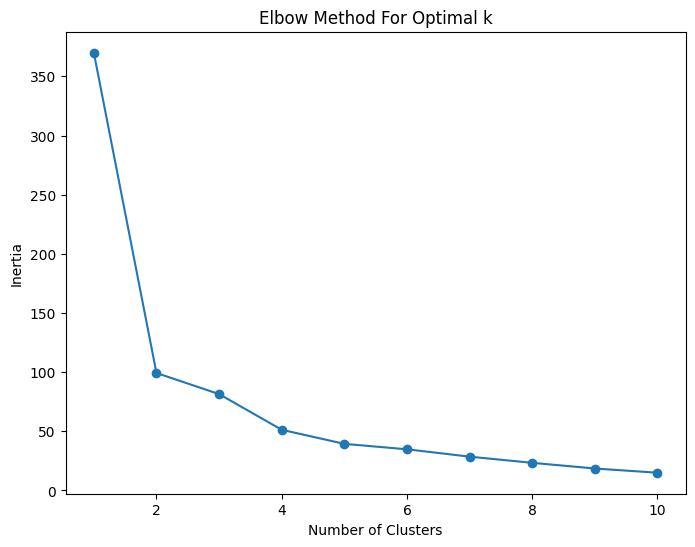

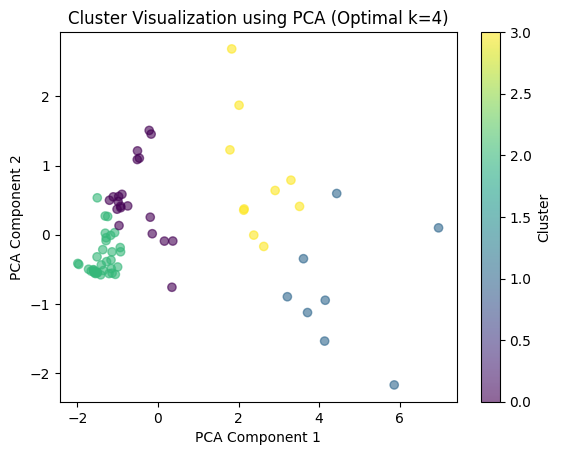

  Cluster           2 W                         3 W                    4 W  \
                   mean           std          mean          std      mean   
0       0   6758.650000   7359.416176  12083.800000  3767.618368   587.550   
1       1  75902.500000  14138.306577  38749.125000  4232.408684  5372.125   
2       2   2004.472222   2622.119399   7914.388889  3281.559101   275.250   
3       3  43891.200000  10102.841226  26241.300000  5900.544251  2953.300   

                       BUS                     TOTAL                
           std        mean        std           mean           std  
0   524.828641  104.400000  40.047866   19534.400000  10764.854938  
1  2008.819941  145.625000  76.150110  120169.375000  19480.859705  
2   229.636281   20.666667  24.077257   10214.777778   4311.839767  
3   687.332695  209.400000  59.781454   73295.200000  14767.685953  


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Convert 'YEAR' to datetime format
df['YEAR'] = pd.to_datetime(df['YEAR'], format='%Y-%m')

# Fill missing values with interpolation or other methods if necessary
df.fillna(method='ffill', inplace=True)

# Extract the month and year from the 'YEAR' column (if needed)
df['Month'] = df['YEAR'].dt.month
df['Year'] = df['YEAR'].dt.year

# Feature selection: focusing on sales data for clustering
features = ['2 W', '3 W', '4 W', 'BUS', 'TOTAL']
df_features = df[features]

# Normalize the data (important for clustering algorithms)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_features)

# Determine the optimal number of clusters using the elbow method
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph to find the optimal k
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# From the plot, select the optimal number of clusters
optimal_k = 4

# Apply KMeans with the selected number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(df_scaled)

# Apply PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_scaled)

# Visualize the clusters in PCA space
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis', alpha=0.6)
plt.title(f'Cluster Visualization using PCA (Optimal k={optimal_k})')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

# Summarize the clusters
df['Cluster'] = kmeans.labels_
cluster_summary = df.groupby('Cluster').agg({
    '2 W': ['mean', 'std'],
    '3 W': ['mean', 'std'],
    '4 W': ['mean', 'std'],
    'BUS': ['mean', 'std'],
    'TOTAL': ['mean', 'std']
}).reset_index()

print(cluster_summary)


In [ ]:
from google.colab import files
import pandas as pd
import io

uploaded = files.upload()

df = pd.read_csv(io.BytesIO(uploaded['ev-charging-stations-india.csv']))
print(df.head())

Saving ev-charging-stations-india.csv to ev-charging-stations-india.csv
                                                name          state      city  \
0                 Neelkanth Star DC Charging Station        Haryana  Gurugram   
1                       Galleria DC Charging Station        Haryana  Gurugram   
2  Highway Xpress (Jaipur-Delhi) DC charging station      Rajasthan    Behror   
3                  Food Carnival DC Charging Station  Uttar Pradesh  Khatauli   
4                  Food Carnival AC Charging Station  Uttar Pradesh  Khatauli   

                                             address lattitude  longitude  \
0  Neelkanth Star Karnal, NH 44, Gharunda, Kutail...   29.6019    76.9803   
1  DLF Phase IV, Sector 28, Gurugram, Haryana 122022   28.4673    77.0818   
2  Jaipur to Delhi Road, Behror Midway, Behror, R...   27.8751    76.2760   
3  Fun and Food Carnival, NH 58, Khatauli Bypass,...   29.3105    77.7218   
4  NH 58, Khatauli Bypass, Bhainsi, Uttar Pradesh...   2

In [ ]:
# Step 1: Remove duplicates
data_cleaned = df.drop_duplicates()

# Step 2: Handle missing values (drop rows with null values in critical columns)
data_cleaned = data_cleaned.dropna(subset=['state', 'city', 'address', 'lattitude', 'longitude'])

# Step 3: Standardize state names
data_cleaned['state'] = data_cleaned['state'].str.strip().str.lower().str.replace(' +', ' ', regex=True)
data_cleaned['state'] = data_cleaned['state'].str.title()

# Step 4: Verify and correct data types
data_cleaned['lattitude'] = pd.to_numeric(data_cleaned['lattitude'], errors='coerce')
data_cleaned['longitude'] = pd.to_numeric(data_cleaned['longitude'], errors='coerce')
data_cleaned['type'] = pd.to_numeric(data_cleaned['type'], errors='coerce')

# Step 5: Handle invalid geographic data
valid_latitude = data_cleaned['lattitude'].between(-90, 90)
valid_longitude = data_cleaned['longitude'].between(-180, 180)
data_cleaned = data_cleaned[valid_latitude & valid_longitude]

# Define a mapping of common variations and misspellings to standard state names
state_mapping = {
    "Andhra Pradesh": "Andhra Pradesh",
    "AndhraPradesh": "Andhra Pradesh",
    "Andhra pradesh": "Andhra Pradesh",
    "Delhi Ncr": "Delhi",
    "Delhi NCR": "Delhi",
    "Telengana": "Telangana",
    "Uttarkhand": "Uttarakhand",
    "Andaman": "Andaman and Nicobar Islands",
    "Tamilnadu": "Tamil Nadu",
    "Taminadu": "Tamil Nadu",

    # Add other known variations or corrections here
}

# List of valid state names in India
valid_states = [
    "Andhra Pradesh", "Arunachal Pradesh", "Assam", "Bihar", "Chhattisgarh",
    "Delhi", "Goa", "Gujarat", "Haryana", "Himachal Pradesh", "Jammu and Kashmir",
    "Jharkhand", "Karnataka", "Kerala", "Madhya Pradesh", "Maharashtra",
    "Manipur", "Meghalaya", "Mizoram", "Nagaland", "Odisha", "Punjab",
    "Rajasthan", "Sikkim", "Tamil Nadu", "Telangana", "Tripura", "Uttar Pradesh",
    "Uttarakhand", "West Bengal", "Andaman and Nicobar Islands", "Chandigarh",
    "Dadra and Nagar Haveli and Daman and Diu", "Lakshadweep", "Puducherry"
]

# Standardize state names using the mapping
data_cleaned['state'] = data_cleaned['state'].replace(state_mapping)
data_cleaned['state'] = data_cleaned['state'].str.strip().str.title()

# Filter out rows with invalid state names
data_cleaned = data_cleaned[data_cleaned['state'].isin(valid_states)]

# Display cleaned data for verification
data_cleaned.head()

# Display cleaned data
data_cleaned.head()

,name,state,city,address,lattitude,longitude,type
0,Neelkanth Star DC Charging Station,Haryana,Gurugram,"Neelkanth Star Karnal, NH 44, Gharunda, Kutail...",29.6019,76.9803,12.0
1,Galleria DC Charging Station,Haryana,Gurugram,"DLF Phase IV, Sector 28, Gurugram, Haryana 122022",28.4673,77.0818,12.0
2,Highway Xpress (Jaipur-Delhi) DC charging station,Rajasthan,Behror,"Jaipur to Delhi Road, Behror Midway, Behror, R...",27.8751,76.2760,12.0
3,Food Carnival DC Charging Station,Uttar Pradesh,Khatauli,"Fun and Food Carnival, NH 58, Khatauli Bypass,...",29.3105,77.7218,12.0
4,Food Carnival AC Charging Station,Uttar Pradesh,Khatauli,"NH 58, Khatauli Bypass, Bhainsi, Uttar Pradesh...",29.3105,77.7218,12.0


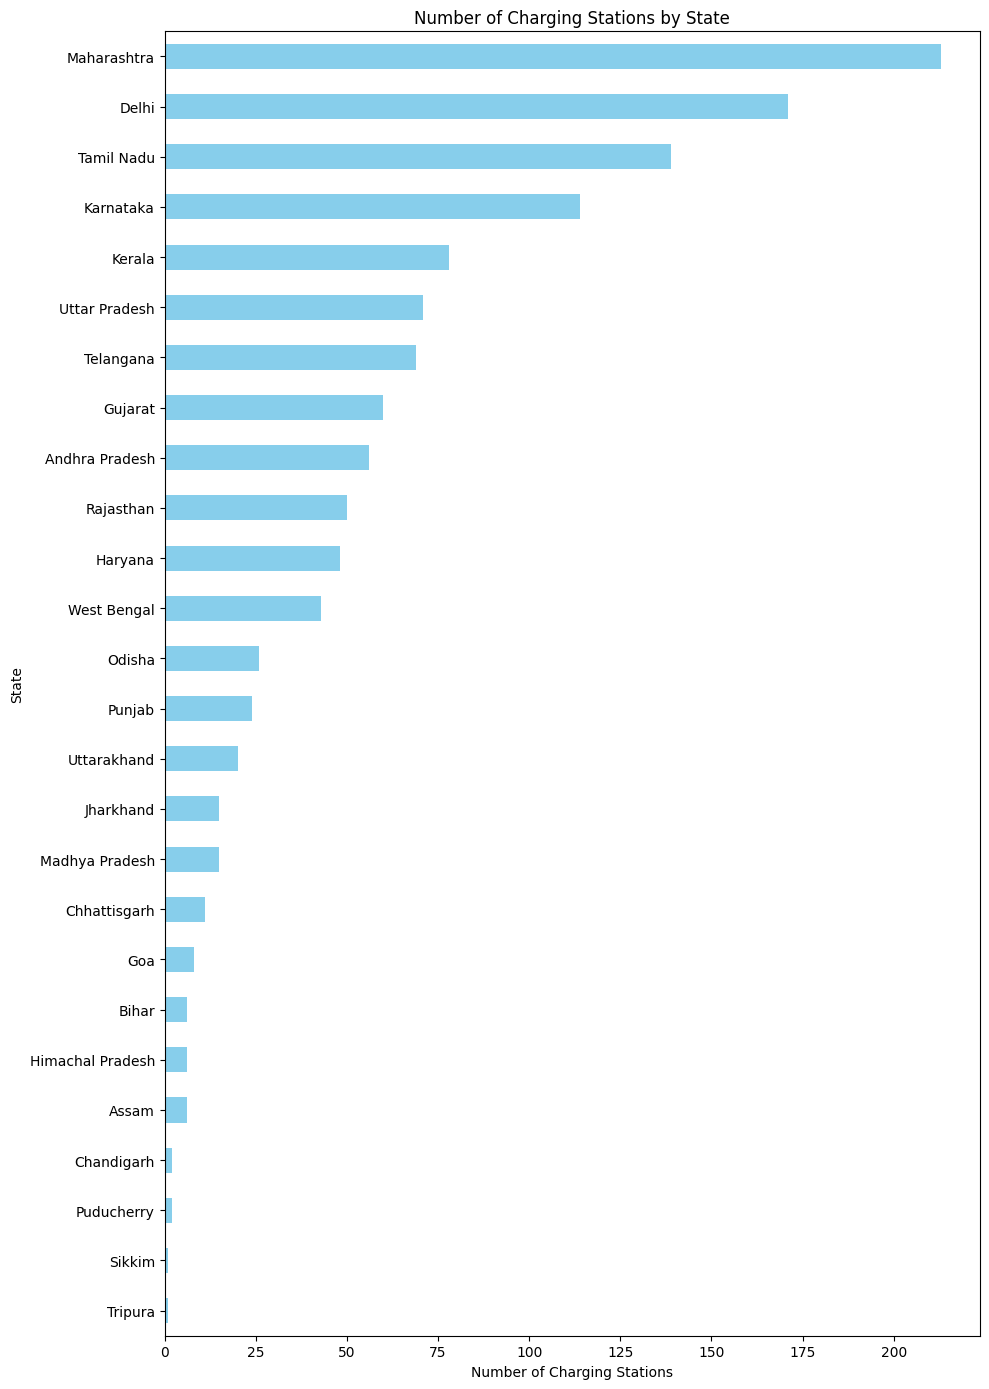

In [ ]:
import matplotlib.pyplot as plt
state_counts = data_cleaned['state'].value_counts().sort_values(ascending=True)
plt.figure(figsize=(10, 14))
state_counts.plot(kind='barh', color='skyblue')
plt.title('Number of Charging Stations by State')
plt.xlabel('Number of Charging Stations')
plt.ylabel('State')
_ = plt.tight_layout()

In [ ]:
# Aggregate charging station data by state and city
charging_station_summary = data_cleaned.groupby(['state', 'city']).size().reset_index(name='station_count')

# Aggregate by state to understand state-level infrastructure
state_summary = charging_station_summary.groupby('state')['station_count'].sum().reset_index()

# Display the summaries for review
charging_station_summary.head(), state_summary.head()


(            state         city  station_count
 0  Andhra Pradesh    Anantapur              2
 1  Andhra Pradesh  Anantapuram              2
 2  Andhra Pradesh   Bhimavaram              1
 3  Andhra Pradesh     Chittoor              4
 4  Andhra Pradesh      Gadanki              2,
             state  station_count
 0  Andhra Pradesh             56
 1           Assam              6
 2           Bihar              6
 3      Chandigarh              2
 4    Chhattisgarh             11)

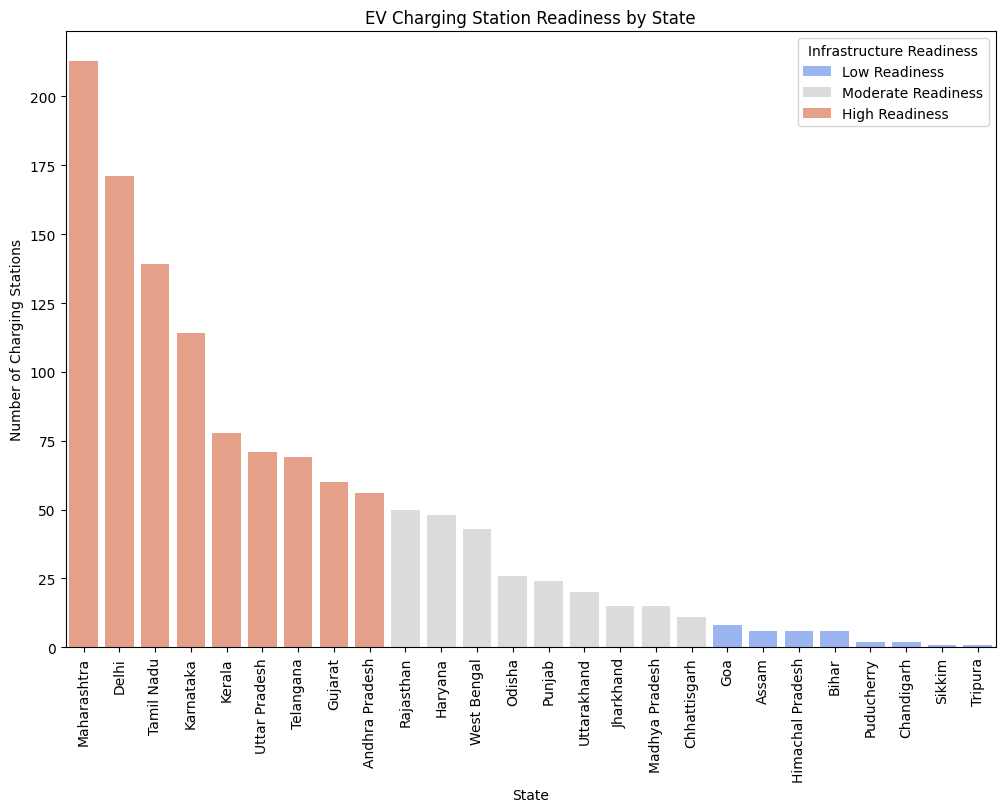

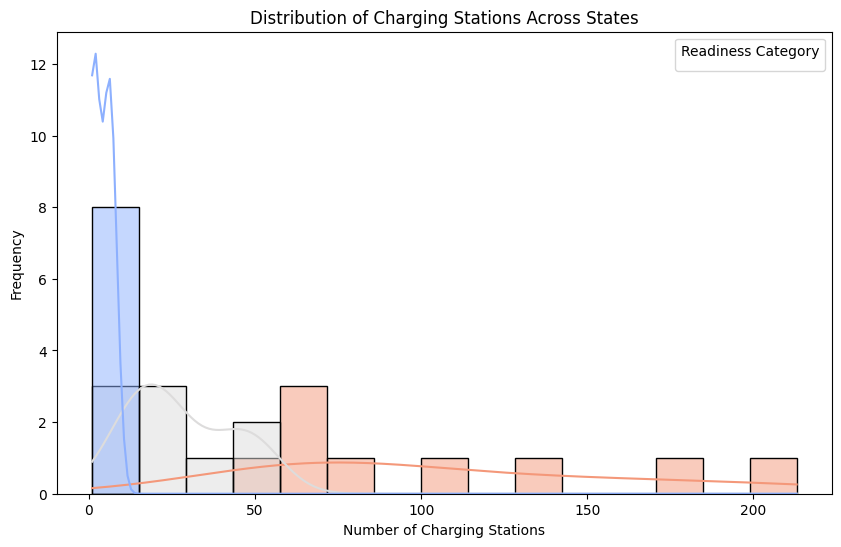

,state,station_count,Station_Category
0,Andhra Pradesh,56,High Readiness
1,Assam,6,Low Readiness
2,Bihar,6,Low Readiness
3,Chandigarh,2,Low Readiness
4,Chhattisgarh,11,Moderate Readiness


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'state_summary' contains 'state' and 'station_count' columns
state_summary_cleaned = state_summary.copy()

# Step 1: Segment stations into categories based on their counts
state_summary_cleaned['Station_Category'] = pd.cut(
    state_summary_cleaned['station_count'],
    bins=[-1, 10, 50, 500],
    labels=['Low Readiness', 'Moderate Readiness', 'High Readiness']
)

# Step 2: Visualize readiness categories
plt.figure(figsize=(12, 8))
sns.barplot(
    data=state_summary_cleaned.sort_values(by='station_count', ascending=False),
    x='state',
    y='station_count',
    hue='Station_Category',
    dodge=False,
    palette='coolwarm'
)
plt.xticks(rotation=90)
plt.title('EV Charging Station Readiness by State')
plt.xlabel('State')
plt.ylabel('Number of Charging Stations')
plt.legend(title='Infrastructure Readiness')
plt.show()

# Step 3: Create a distribution plot for station counts
plt.figure(figsize=(10, 6))
sns.histplot(
    data=state_summary_cleaned,
    x='station_count',
    hue='Station_Category',
    kde=True,
    palette='coolwarm',
    bins=15
)
plt.title('Distribution of Charging Stations Across States')
plt.xlabel('Number of Charging Stations')
plt.ylabel('Frequency')
plt.legend(title='Readiness Category')
plt.show()

# Display segmentation results for review
state_summary_cleaned[['state', 'station_count', 'Station_Category']].head()


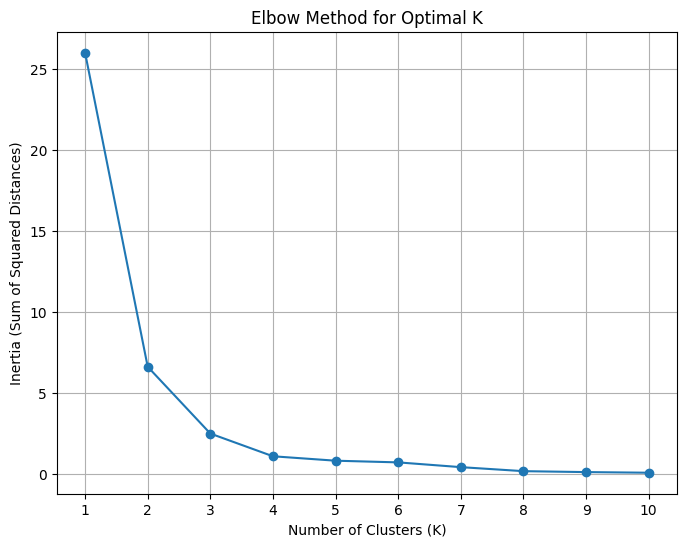

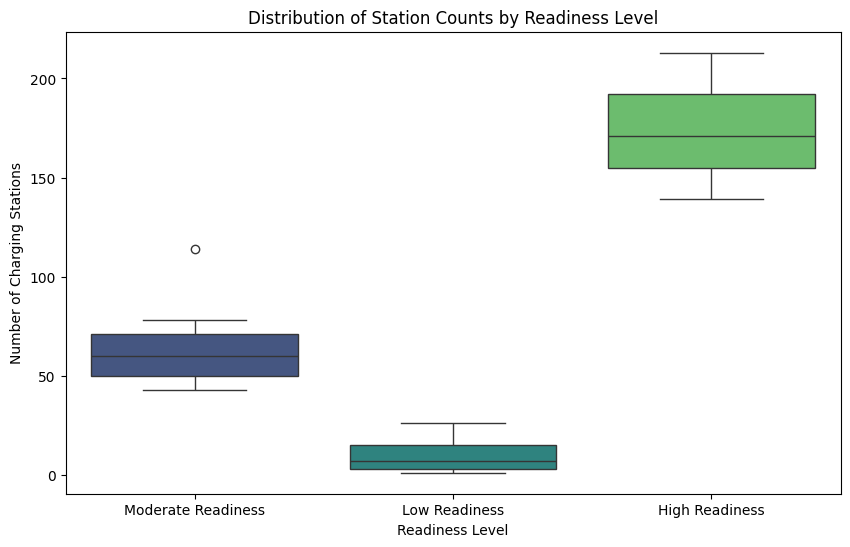

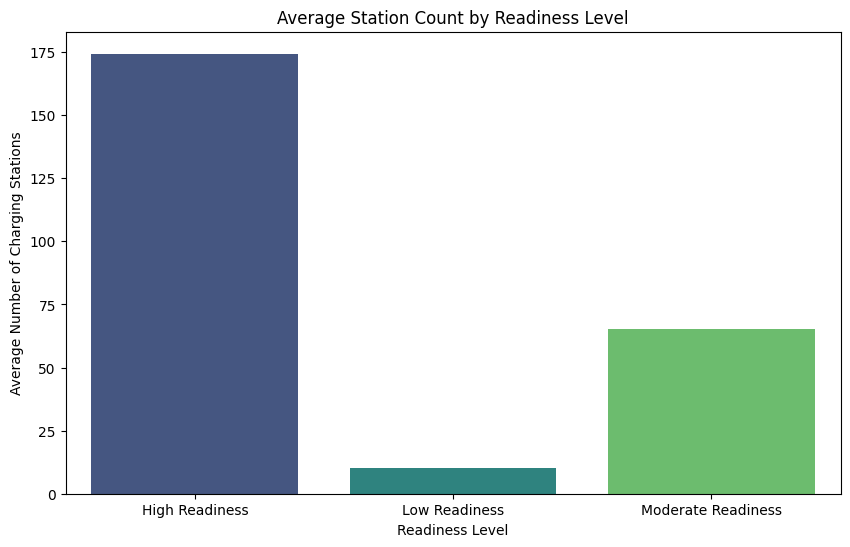


Cluster Summary Statistics:
                    count        mean        std    min    25%    50%    75%  \
Readiness_Level                                                                
High Readiness        3.0  174.333333  37.112442  139.0  155.0  171.0  192.0   
Low Readiness        14.0   10.214286   8.523078    1.0    3.0    7.0   15.0   
Moderate Readiness    9.0   65.444444  21.576093   43.0   50.0   60.0   71.0   

                      max  
Readiness_Level            
High Readiness      213.0  
Low Readiness        26.0  
Moderate Readiness  114.0  


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Assuming 'state_summary' contains 'state' and 'station_count' columns
state_summary_cleaned = state_summary.copy()

# Step 1: Standardize station counts
scaler = StandardScaler()
state_summary_cleaned['scaled_station_count'] = scaler.fit_transform(state_summary_cleaned[['station_count']])

# Step 2: Elbow Method to find optimal number of clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(state_summary_cleaned[['scaled_station_count']])
    inertia.append(kmeans.inertia_)

# Step 3: Plot inertia to identify the elbow point
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

# Based on the elbow method, let's assume K=3 is the optimal number of clusters (you can change this based on the plot)
optimal_k = 3

# Step 4: Apply K-means clustering with the chosen K
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
state_summary_cleaned['Cluster'] = kmeans.fit_predict(state_summary_cleaned[['scaled_station_count']])

# Step 5: Map clusters to readiness labels
readiness_labels = {0: 'Low Readiness', 1: 'Moderate Readiness', 2: 'High Readiness'}
state_summary_cleaned['Readiness_Level'] = state_summary_cleaned['Cluster'].map(readiness_labels)

# Step 6: Visualize clusters with a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=state_summary_cleaned,
    x='Readiness_Level',
    y='station_count',
    palette='viridis'
)
plt.title('Distribution of Station Counts by Readiness Level')
plt.xlabel('Readiness Level')
plt.ylabel('Number of Charging Stations')
plt.show()

# Step 7: Visualize the average station count per readiness level using a barplot
readiness_means = state_summary_cleaned.groupby('Readiness_Level')['station_count'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(
    x=readiness_means.index,
    y=readiness_means.values,
    palette='viridis'
)
plt.title('Average Station Count by Readiness Level')
plt.xlabel('Readiness Level')
plt.ylabel('Average Number of Charging Stations')
plt.show()

# Step 8: Display the clustering results (first few rows)
state_summary_cleaned[['state', 'station_count', 'Readiness_Level']].head()

# Step 9: Summarize each cluster
cluster_summary = state_summary_cleaned.groupby('Readiness_Level')['station_count'].describe()

print("\nCluster Summary Statistics:")
print(cluster_summary)

# Cluster Summary and Market Segmentation

### Cluster 0:
- **2 W**:
  - Mean = 6758.65: Average sales of electric two-wheelers.
  - Std = 7359.42: High variability in sales (300–14,000).
- **3 W**:
  - Mean = 12083.80: Average sales of electric three-wheelers.
  - Std = 3767.62: Moderate variability (8,300–17,800).
- **4 W**:
  - Mean = 587.55: Relatively low sales.
  - Std = 524.83: Moderate variability (63–1,100).
- **BUS**:
  - Mean = 104.4: Low sales.
  - Std = 40.05: Low variability.
- **TOTAL**:
  - Mean = 19534.4: Average total sales.
  - Std = 10764.85: High variability.

### Cluster 1:
- **2 W**:
  - Mean = 75902.5: Very high sales.
  - Std = 14138.31: Significant variability.
- **3 W**:
  - Mean = 38749.13: High sales.
  - Std = 4232.41: Moderate variability.
- **4 W**:
  - Mean = 5372.13: High sales.
  - Std = 2008.82: Moderate variability.
- **BUS**:
  - Mean = 145.63: High sales.
  - Std = 76.15: Moderate variability.
- **TOTAL**:
  - Mean = 120169.38: Very high total sales.
  - Std = 19480.86: Significant variability.

### Cluster 2:
- **2 W**:
  - Mean = 2004.47: Moderate sales.
  - Std = 2622.12: High variability.
- **3 W**:
  - Mean = 7914.39: Higher sales.
  - Std = 3281.56: High variability.
- **4 W**:
  - Mean = 275.25: Relatively low sales.
  - Std = 229.64: Moderate variability.
- **BUS**:
  - Mean = 20.67: Very low sales.
  - Std = 24.08: High variability.
- **TOTAL**:
  - Mean = 10214.78: Moderate total sales.
  - Std = 4311.84: Moderate variability.

### Cluster 3:
- **2 W**:
  - Mean = 43891.2: Very high sales.
  - Std = 10102.84: High variability.
- **3 W**:
  - Mean = 26241.3: High sales.
  - Std = 5900.54: High variability.
- **4 W**:
  - Mean = 2953.3: Moderate sales.
  - Std = 687.33: Moderate variability.
- **BUS**:
  - Mean = 209.4: Moderate sales.
  - Std = 59.78: Low variability.
- **TOTAL**:
  - Mean = 73295.2: High total sales.
  - Std = 14767.69: High variability.

---

## General Interpretation
- **Cluster 0**: Moderate sales with variability; represents growing but diverse markets.
- **Cluster 1**: Very high sales across all categories; likely urban or mature markets.
- **Cluster 2**: Moderate overall sales, focused on three-wheelers; emerging market.
- **Cluster 3**: High sales in two-wheelers and three-wheelers; regions with high EV adoption.

---

## Strategy Recommendations

### Cluster 1 (High Sales, Diverse EV Demand):
- **Target Market**: Mature market with strong adoption.
- **Strategy**:
  - Product Focus: Broad range of EVs.
  - Marketing: Highlight product advantages in a competitive market.
  - Sales: Partnerships with fleet operators.

### Cluster 3 (High Two-Wheeler and Three-Wheeler Sales):
- **Target Market**: Urban areas with high transportation needs.
- **Strategy**:
  - Product Focus: Affordable, high-performance two- and three-wheelers.
  - Marketing: Target urban commuters and delivery services.
  - Sales: Partnerships with local businesses.

### Cluster 2 (Moderate Sales, Focus on Three-Wheelers):
- **Target Market**: Emerging markets for three-wheelers.
- **Strategy**:
  - Product Focus: Affordable electric three-wheelers.
  - Marketing: Emphasize financial benefits.
  - Sales: Engage with local transport companies.

### Cluster 0 (Lower Sales, Stable Market):
- **Target Market**: Niche or early-stage markets.
- **Strategy**:
  - Product Focus: Entry-level two-wheelers.
  - Marketing: Education and awareness campaigns.
  - Sales: Leverage government incentives.

---

## Infrastructure Readiness Insights

### High Readiness Cluster:
- **States**: 3
- **Mean Stations**: 174
- **Inference**: Well-prepared with consistent EV infrastructure.

### Moderate Readiness Cluster:
- **States**: 9
- **Mean Stations**: 65.44
- **Inference**: Progressing, needs further development.

### Low Readiness Cluster:
- **States**: 14
- **Mean Stations**: 10.21
- **Inference**: Significant gaps in infrastructure; requires major investment.

---

## Actionable Insights
- **Segmentation by Vehicle Type**:
  - High sales: Clusters 1 and 3.
  - Niches: Clusters 2 and 0.
- **Segmentation by Region**:
  - Urban: Clusters 1 and 3.
  - Rural/underserved: Cluster 0.

### Tailored Strategies
- High-demand clusters: Aggressive market expansion.
- Moderate clusters: Incentives and affordability.
- Low readiness regions: Infrastructure development focus.

### Continuous Monitoring
Regularly reassess market trends and adjust strategies to align with evolving demands.
